 ## 4. Comparison of Magnitudes

In [1]:
from sympy import (
    Abs,
    binomial,
    Eq,
    factorial,
    fps,
    IndexedBase,
    Idx,
    limit_seq,
    oo,
    S,
    SeqAdd,
    SeqMul,
    sequence,
    solveset,
    Sum,
    symbols
)
from sympy.plotting.plot import (
    plot,
    plot3d
)

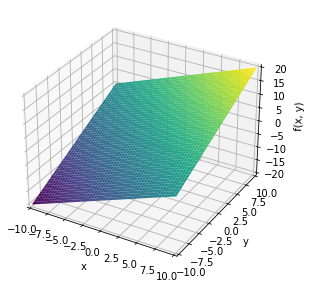

In [2]:
x, y = symbols("x, y")

plot3d(x+y, (x, -10, 10), (y, -10, 10))

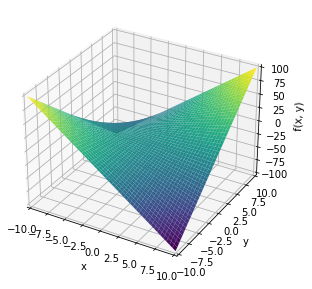

In [3]:
plot3d(x*y, (x, -10, 10), (y, -10, 10))

In [4]:
a, b, c = symbols("a, b, c")

prop1 = (a < b) >> (a + c < b + c)
prop1

Implies(a < b, a + c < b + c)

In [5]:
prop1.subs([(a, 2), (b, 3), (c, 4)])

True

In [6]:
prop2 = ((a < b) & (0 < c)) >> (a*c < b*c)
prop2

Implies((c > 0) & (a < b), a*c < b*c)

In [7]:
prop2.subs([(a, 2), (b, 3), (c, 4)])

True

In [8]:
rule1 = Eq(Abs(a*b), Abs(a)*Abs(b))
rule1

Eq(Abs(a*b), Abs(a)*Abs(b))

In [9]:
rule1.subs([(a, -3), (b, 4)])

True

In [10]:
rule2 = Abs(a + b) <= Abs(a) + Abs(b)
rule2

Abs(a + b) <= Abs(a) + Abs(b)

In [11]:
rule2.subs([(a, -3), (b, 4)])

True

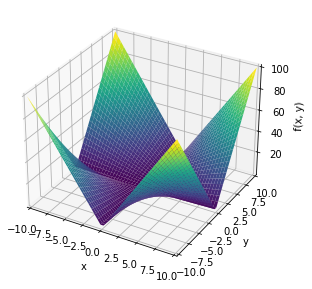

In [12]:
plot3d(Abs(x*y), (x, -10, 10), (y, -10, 10))

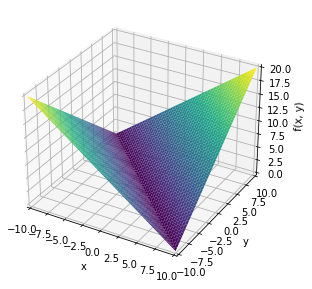

In [13]:
plot3d(Abs(x+y), (x, -10, 10), (y, -10, 10))

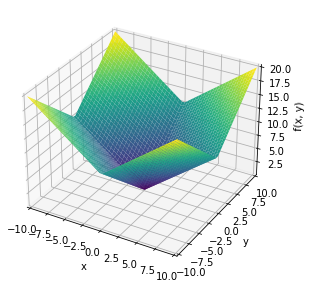

In [14]:
plot3d(Abs(x) + Abs(y), (x, -10, 10), (y, -10, 10))

In [15]:
nearness = Abs(a - b)
nearness

Abs(a - b)

In [16]:
nearness.subs([(a, 2), (b, 3)])

1

In [17]:
nearness.subs([(a, 2), (b, 4)])

2

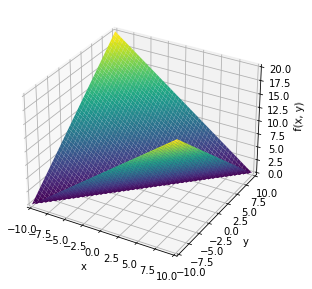

In [18]:
plot3d(Abs(x-y), (x, -10, 10), (y, -10, 10))

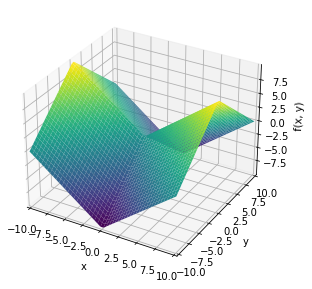

In [19]:
plot3d(Abs(x)-Abs(y), (x, -10, 10), (y, -10, 10))

 **Archimedean Law**
 If a and b are positive, then there is a natural number n such that na > b

 > Each real number can be approximated - to any degree of accuracy = by a rational number. This amounts to saying that there is a rational between any two reals.

In [20]:
n = symbols("n")
expr1 = n*a > b
archimedean = solveset(expr1, n, domain=S.Naturals)
archimedean

ConditionSet(n, a*n > b, Naturals)

In [21]:
expr2 = expr1.subs([(a, 1), (b, 4)])
solveset(expr2, n, domain=S.Naturals)

Range(5, oo, 1)

In [22]:
m = symbols("m")

theorem = ((0 < b) & (b < c)) >> ((b < m/n) & (m/n < c))
theorem

Implies((b > 0) & (b < c), (b < m/n) & (m/n < c))

In [23]:
((c - b) > 0) >> ((n * (c - b)) > 1)

Implies(-b + c > 0, n*(-b + c) > 1)

In [24]:
expr3 = Eq(((n * (c - b)) > 1), c > b + (1/n))
expr3

Eq(n*(-b + c) > 1, c > b + 1/n)

In [25]:
expr4 = expr3.subs([(b, 2), (c, 3)])
expr4

Eq(n > 1, 3 > 2 + 1/n)

In [26]:
expr4.subs(n, 2)

True

In [27]:
expr5 = Eq(m*1 > n*b, b < (m/n))
expr5

Eq(m > b*n, b < m/n)

In [28]:
expr6 = expr5.subs([(b, 2), (n, 3)])
expr6

Eq(m > 6, 2 < m/3)

In [29]:
expr6.subs(m, 7)

True

In [30]:
expr7 = Eq(m - 1 <= n*b, m/n <= b + (1/n))
expr7

Eq(m - 1 <= b*n, m/n <= b + 1/n)

In [31]:
expr8 = expr7.subs([(b, 2), (n, 3)])
expr8

Eq(m - 1 <= 6, m/3 <= 7/3)

In [32]:
expr8.subs(m, 7)

True

In [33]:
a_base = IndexedBase("a")
ni = Idx("n", (1, oo))
a = a_base[ni]
a

a[n]

In [34]:
eps, k = symbols("ε, k")

expr9 = ((eps > 0) & (ni > k)) >> (Abs(a - b) < eps)
expr9

Implies((ε > 0) & (n > k), Abs(b - a[n]) < ε)

In [35]:
expr10 = (ni > k) >> (Abs(a - b) < 1/m)
expr10

Implies(n > k, Abs(b - a[n]) < 1/m)

In [36]:
seq1 = sequence(((2*(2**n))-1)/(2**n), (n, 0, oo))
seq1

SeqFormula((2*2**n - 1)/2**n, (n, 0, oo))

In [37]:
b = limit_seq(seq1.formula, *seq1.variables)
b

2

In [38]:
seq2 = sequence((1+(1/n))**n, (n, 0, oo))
seq2

SeqFormula((1 + 1/n)**n, (n, 0, oo))

In [39]:
d = limit_seq(seq2.formula, *seq2.variables)
d

E

In [40]:
seq3 = SeqAdd(seq1, seq2)
seq3

SeqFormula((1 + 1/n)**n + (2*2**n - 1)/2**n, (n, 0, oo))

In [41]:
b_d = limit_seq(seq3.formula, *seq3.variables) 
b_d

2 + E

In [42]:
b_and_d = b + d
b_and_d

2 + E

In [43]:
Eq(b_d, b_and_d)

True

In [44]:
seq4 = SeqMul(seq1, seq2)
seq4

SeqFormula((1 + 1/n)**n*(2*2**n - 1)/2**n, (n, 0, oo))

In [45]:
bd = limit_seq(seq4.formula, *seq4.variables)
bd

2*E

In [46]:
b_mul_d = b * d
b_mul_d

2*E

In [47]:
Eq(bd, b_mul_d)

True

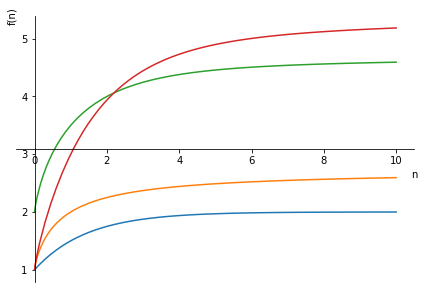

In [48]:
plt_range = (n, 0, 10)
p1 = plot(seq1.formula, plt_range, show=False)
p2 = plot(seq2.formula, plt_range, show=False)
p3 = plot(seq3.formula, plt_range, show=False)
p4 = plot(seq4.formula, plt_range, show=False)

p1.extend(p2)
p1.extend(p3)
p1.extend(p4)
p1.show()

In [49]:
sixth = (1/10) + Sum(6/(10**x), (x, 2, oo))
sixth

Sum(6/10**x, (x, 2, oo)) + 0.1

In [50]:
sixth.doit()

0.166666666666667

In [51]:
expr11 = (1 + x)**m
expr11

(x + 1)**m

In [52]:
expr11.subs([(m, 2), (x, 3)])

16

In [53]:
binomial_exp = Sum(binomial(m, n) * (x**n), (n, 0, m))
binomial_exp

Sum(x**n*binomial(m, n), (n, 0, m))

In [54]:
binomial_theorem = Eq(expr11, binomial_exp)
binomial_theorem

Eq((x + 1)**m, Sum(x**n*binomial(m, n), (n, 0, m)))

In [55]:
binomial_theorem.subs([(m, 2), (x, 3)]).doit()

True

In [56]:
harmonic_series = Sum(1/n, (n, 1, oo))
harmonic_series

Sum(1/n, (n, 1, oo))

In [57]:
harmonic_series.is_convergent()

False

In [58]:
harmonic_series.doit()

oo

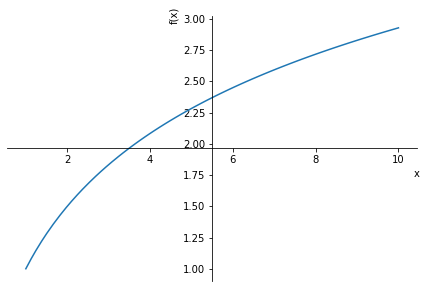

In [59]:
plot(Sum(harmonic_series.function, (n, 1, x)).doit(), (x, 1, 10))

In [60]:
t = symbols('t')
a = IndexedBase('a')
a_n = a[n]
s1 = Sum(a_n*(t**n), (n, -oo, oo))
s1

Sum(t**n*a[n], (n, -oo, oo))

In [61]:
b = IndexedBase('b')
b_n = b[n]
s2 = Sum(b_n*(t**n), (n, -oo, oo))
s2

Sum(t**n*b[n], (n, -oo, oo))

In [62]:
Sum(s1.function * s2.function, (n, 0, oo))

Sum(t**(2*n)*a[n]*b[n], (n, 0, oo))

In [67]:
fps(t + (2*t))

FormalPowerSeries(3*t, t, 0, 1, (SeqFormula(Coeff(3*t, t, _k), (_k, 1, oo)), SeqFormula(t**_k, (_k, 0, oo)), 0))